# Montgomery County Arrests Analysis
## Trevor Andrus

Import Packages

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import getpass
import mysql.connector
from sqlalchemy import create_engine
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 18})

Creating SQL connection

In [14]:
user = input("Enter Username")
pwd = input("Enter Password")
host = input("Enter Host")
database = input("Enter Database")

cnx_string = 'mysql+pymysql://'+user + ':'+pwd + '@' + host + '/' + database

cnxn = create_engine(cnx_string)

Enter Usernameandrustn
Enter Passwordandrustn6011
Enter Host10.18.54.68
Enter Databaseandrustn


In [15]:
query = "SELECT * from Arrests"
Arrests = pd.read_sql(query, cnxn)

In [16]:
Arrests

last_name   first_name  age                                street  \
0            NARDELLA      CHARLES   29             4500 Block Of Avondalo St   
1             ADDISON       DAZHAN   26  18600 Block Of CARRIAGE WALK CIRCLE.   
2              DUNCAN  CHRISTOPHER   38      16200 Block Of Placid Pine Drive   
3              LITTLE         PAUL   39             8100 Block Of georgia ave   
4           PHAM-TRAN         THAO   29          13300 Block Of Rushing Water   
..                ...          ...  ...                                   ...   
200             KUNBI    FETLEWORK   45           8700 Block Of BARRON STREET   
201           DICKENS      JOMOKIN   27             7600 Block Of Hammond Ave   
202  BENAVIDES HUNTER       WALTER   49            1800 Block Of metzerott rd   
203       CRUZ FLORES      ROMARIO   25        12600 Block Of Montclair drive   
204        REYES LAZO         JOSE   40      800 Block Of Clopper Rd. Apt. B4   

              city state arrest_date  \
0         BETHESDA    MD  2021-03-18   
1     GAITHERSBURG    MD  2021-03-19   
2           ORANGE    MD  2021-03-19   
3    SILVER SPRING    MD  2021-03-20   
4       GERMANTOWN    MD  2021-03-20   
..             ...   ...         ...   
200    TAKOMA PARK    MD  2021-06-25   
201    TAKOMA PARK    MD  2021-06-25   
202        Adelphi    MD  2021-06-26   
203  SILVER SPRING    MD  2021-06-26   
204   GAITHERSBURG    MD  2021-06-26   

                                      offense middle_name   insert_dt  
0    OBSTRUCTING & HINDERING A POLICE OFFICER        None  2021-03-19  
1                        ASSAULT-FIRST DEGREE      CORTEZ  2021-03-19  
2                OBT PROP VUL ADLT-L/T $1,500        ALAN  2021-03-20  
3                       ASSAULT-SECOND DEGREE        None  2021-03-20  
4                     THEFT LESS THAN $100.00      NGUYEN  2021-03-20  
..                                        ...         ...         ...  
200                  VIOLATE PROTECTIVE ORDER      BEKELE  2021-06-26  
201                     ASSAULT-SECOND DEGREE     MARKELL  2021-06-26  
202                TRESPASS: PRIVATE PROPERTY      ROMMEL  2021-06-26  
203                CDS: POSSESS-NOT MARIJUANA        None  2021-06-26  
204                     ASSAULT-SECOND DEGREE        None  2021-06-27  

[205 rows x 10 columns]

Querying from the full table

In [13]:
query2 = "SELECT * from ArrestsFull"
ArrestsFull = pd.read_sql(query2, cnxn)

In [121]:
ArrestsFull.head(10)

last_name first_name  age                            street  \
0        CLAROS       JOSE   44       18000 Block Of DRIFTWOOD CT   
1       SIMMONS      HEIDI   36            0 Block Of marigold ct   
2       MELCHER     JOSEPH   34          35100 Block Of melton st   
3         DIXON     JOSHUA   19        9300 Block Of Taverney Ter   
4  ZELAYA REYES     HECTOR   18          3800 Block Of Kelsey St.   
5       GALINDO    MIRABAL   26       2400 Block Of Blueridge Ave   
6     GUTIERREZ   FERNANDO   31       13200 Block Of DUMBARTON DR   
7       VAUGHAN      GINAH   41               Block Of Castle Way   
8        DAVIES      ETHEL   27        14100 Block Of castle blvd   
9      IKPEMGBE  CHRISTIAN   21  19000 Block Of Staleybridge Road   

            city state arrest_date  \
0   GAITHERSBURG    MD  2021-03-25   
1  SILVER SPRING    MD  2021-03-25   
2      ROCKVILLE    MI  2021-03-25   
3   GAITHERSBURG    MD  2021-03-25   
4  SILVER SPRING    MD  2021-03-25   
5  SILVER SPRING    MD  2021-03-24   
6      ROCKVILLE    MD  2021-03-24   
7  SILVER SPRING    MD  2021-03-24   
8  SILVER SPRING    MD  2021-03-24   
9     GERMANTOWN    MD  2021-03-24   

                                             offense middle_name   insert_dt  \
0  MALICIOUS DESTRUCTION OF PROPERTY/VALUE LESS T...     BIBIANO  2021-03-25   
1                      MOTOR VEHICLE/UNLAWFUL TAKING        BETH  2021-03-25   
2                              ASSAULT-SECOND DEGREE      DANIEL  2021-03-25   
3              CDS POSSESS WITH INTENT TO DISTRIBUTE        DAVE  2021-03-25   
4                              ASSAULT-SECOND DEGREE     JOCKSAN  2021-03-25   
5                              ASSAULT-SECOND DEGREE        ABEL  2021-03-25   
6                              ASSAULT-SECOND DEGREE        None  2021-03-25   
7                      BURGLARY- FOURTH DEGREE THEFT        None  2021-03-25   
8  DRIVING/ATTEMPTING DRIVE MOTOR VEH. ON HWY W/O...        None  2021-03-25   
9                          LOADED HANDGUN IN VEHICLE     OGBONNA  2021-03-25   

             FullName  weekday  
0          JOSECLAROS        3  
1        HEIDISIMMONS        3  
2       JOSEPHMELCHER        3  
3         JOSHUADIXON        3  
4  HECTORZELAYA REYES        3  
5      MIRABALGALINDO        2  
6   FERNANDOGUTIERREZ        2  
7        GINAHVAUGHAN        2  
8         ETHELDAVIES        2  
9   CHRISTIANIKPEMGBE        2

## Arrest Date

After querying all the available data, we were left with 329 entries. The dates covered ranged from February 23 - March 25 of 2021. Considering we had mainly categorical variables, I first wanted to go through and analyze the value counts of each to identify the most common values and look for anything interesting on a single variable level. 

10 Most common Arrest dates

In [27]:
ArrestsFull["arrest_date"].value_counts()

2021-03-17    21
2021-03-18    19
2021-03-03    19
2021-03-16    18
2021-03-01    16
2021-03-11    16
2021-03-15    16
2021-03-05    16
2021-02-25    15
2021-03-04    14
Name: arrest_date, dtype: int64

It seems that if you want to get arrested, March 17 was the best day for you to try and do so. Although this date doesn't seem significantly higher than all the rest. I next wanted to create a weekday column in the dataframe to see if more arrests occurred on weekdays or weekends. 

In [67]:
ArrestsFull["weekday"] = 0
for i in range(len(ArrestsFull["arrest_date"])):
    ArrestsFull["weekday"][i] = ArrestsFull["arrest_date"][i].weekday()

In [68]:
ArrestsFull["weekday"].value_counts()

3    69
2    62
0    55
1    52
4    42
6    27
5    22
Name: weekday, dtype: int64

The pandas weekday function returns an integer corresponding to the day of the week - 1 being monday, and 6 being sunday. Interestingly from what we see above, Wednesday was the most common day to be arrested on, and the 3 weekend days were the days on which you were least likely to be arrested. This initially went against what I thought would happen - I assumed people on the weekends would be more rambunctious and be arrested more often, but this was not the case. It may be that police are more leanient on weekends, or that less police work weekends than weekdays. At this point all possible explanations are just speculation. 

## Age

I next took a look at the age variable

In [24]:
ArrestsFull["age"].describe()

count    329.000000
mean      33.869301
std       11.200416
min       17.000000
25%       25.000000
50%       31.000000
75%       41.000000
max       74.000000
Name: age, dtype: float64

From the above we can see that the mean age of someone arrested in Montgomery county over the past month is 33. The oldest person arrested was 74, and the youngest was 17. Just out of curiosity, I printed the whole row for the 74 year old criminal below:

In [69]:
ArrestsFull[ArrestsFull["age"] == 74]

last_name first_name  age                      street       city state  \
32     LEVIN      PERRY   74  11900 Block Of PARKLAND DR  ROCKVILLE    MD   

   arrest_date                      offense middle_name   insert_dt  \
32  2021-03-22  PEACE ORDER: FAIL TO COMPLY      STUART  2021-03-25   

      FullName  weekday  
32  PERRYLEVIN        0

Being arrested for failure to comply, it sounds like he may have been causing trouble and then refusing to stop when approached by law enforcement. 

## Offense

Continuing the theme of looking at specific offenses, I then took a look at the offense column as a whole.

In [82]:
ArrestsFull["offense"].value_counts().head(10)

ASSAULT-SECOND DEGREE                                                            48
ASSAULT-FIRST DEGREE                                                             31
THEFT: $100 TO UNDER $1,500                                                      15
CDS: POSSESS-NOT MARIJUANA                                                       11
VIOLATE PROTECTIVE ORDER                                                         11
TRESPASS: PRIVATE PROPERTY                                                       11
DISORDERLY CONDUCT                                                                9
DRIVING/ATTEMPTING DRIVE MOTOR VEH. ON HWY W/O REQ. LICENSE AND AUTHORIZATION     9
ARMED ROBBERY                                                                     8
THEFT LESS THAN $100.00                                                           7
Name: offense, dtype: int64

From the above we can see that the most common offenses were assault (by a considerable margin might I add), and that thankfully the most common crimes are not too severe. Although I was curious as to how many severe crimes occured over the past month, and after looking through all the individual offenses found the following:

9 counts of sex abuse against a minor

3 counts of child pornography (1 with intent to distribute)

2 counts of kidnapping

1 count of first degree murder

## Name

After seeing the extent of the offenses, I became curious if anyone was arrested multiple times over the past month. I created a column in the dataframe combining the first an last names of people arrested, and looked at the individual values of each. 

In [73]:
ArrestsFull["FullName"] = ArrestsFull["first_name"] + ArrestsFull["last_name"]
ArrestsFull["FullName"].value_counts().head(10)

LAFEBRACKENRIDGE     4
JUVENILEJUVENILE     3
KENNETHBARNHOUSE     2
CASEYMOUSER          2
MICHAELTAPSOBA       2
ANGELAMAYA           2
JORDANDOUVILLE       2
WILLIEBELL           1
RUSSELLCLARKE        1
CLIFFORDMASSAQUOI    1
Name: FullName, dtype: int64

It appears that Lafe Brackenridge was the most frequent culprit, being arrested 4 times in the past month. The second in the list being "Juvenile Juvenile", I assume Montgomery country doesn't publicly disclose the identity of minors. Again for curiosity's sake, I've printed every time that Lafe has been arrested below.

In [79]:
ArrestsFull[ArrestsFull["FullName"] == "LAFEBRACKENRIDGE"]

last_name first_name  age              street       city state  \
73   DOUVILLE     JORDAN   20  Block Of NOT FIXED  ROCKVILLE    MD   
230  DOUVILLE     JORDAN   20  Block Of NOT FIXED  ROCKVILLE    MD   

    arrest_date                        offense middle_name   insert_dt  \
73   2021-03-18                     KIDNAPPING        None  2021-03-25   
230  2021-03-04  MOTOR VEHICLE/UNLAWFUL TAKING        None  2021-03-25   

           FullName  weekday  
73   JORDANDOUVILLE        3  
230  JORDANDOUVILLE        3

After looking at Mr Brackenridge's data, it looks like he wasn't arrested 4 times, but just charged with 4 offenses and arrested once on the 8th of march. I was then curious if any of the other people had actually been arrested more than once in the past month. 

In [80]:
ArrestsFull[ArrestsFull["FullName"] == "JORDANDOUVILLE"]

last_name first_name  age              street       city state  \
73   DOUVILLE     JORDAN   20  Block Of NOT FIXED  ROCKVILLE    MD   
230  DOUVILLE     JORDAN   20  Block Of NOT FIXED  ROCKVILLE    MD   

    arrest_date                        offense middle_name   insert_dt  \
73   2021-03-18                     KIDNAPPING        None  2021-03-25   
230  2021-03-04  MOTOR VEHICLE/UNLAWFUL TAKING        None  2021-03-25   

           FullName  weekday  
73   JORDANDOUVILLE        3  
230  JORDANDOUVILLE        3

After looking at each of the other's data, 4/5 of the people who have two offenses on record were actually arrested twice. Of note, Angel Amaya was arrested twice in two consecutive days, and Jordan Douville was one of the counts of kidnapping that we identified earlier. 

## City

Continuing through the variables, I then looked at which cities were most common to be arrested in. 

In [26]:
ArrestsFull["city"].value_counts().head(10)

SILVER SPRING         90
GAITHERSBURG          45
ROCKVILLE             36
Washington D.C.       31
GERMANTOWN            23
HYATTSVILLE            9
BETHESDA               8
Montgomery Village     8
LAUREL                 6
WASHINGTON             3
Name: city, dtype: int64

<img src="0cd82df9b0b25eeeb1cc1ec7c2aad21e.png">

Picture from : https://www.pinterest.com/pin/68117013090795472/

I also included a map above to get a better idea of where these arrests were occuring. It seems like most occur in and around the Washington DC area - a good portion of them occuring in DC proper and in silver spring (right outside). 

Fun fact - I didn't realize how close this was to my home town, but my home county in Virginia literally borders montgomery county to the south - I live probably 20 minutes from the city of bethesda shown above. 

## Street

I also looked at the values for the street on which people were arrested, but didn't see anything significant there. Here is the top 10 most common places that people were arrested:

In [120]:
ArrestsFull["street"].value_counts().head(10)

NO FIXED ADDRESS                   24
4200 Block Of 4TH STREET NW         4
0 Block Of Taft Ct                  3
13300 Block Of dovedale way         2
Block Of NOT FIXED                  2
8700 Block Of FIRST AVE.            2
900 Block Of W. EDMONSTON DRIVE     1
0 Block Of Hemsted dr.              1
4200 Block Of DIX STREET NE         1
0 Block Of QUEENSCITY PAVEMENT      1
Name: street, dtype: int64

## State

The last individual variable I had left to analyze was state, and I printed all of the values below.

In [41]:
ArrestsFull["state"].value_counts()

MD    284
DC     29
VA      4
FL      3
WV      1
MI      1
TX      1
NJ      1
CA      1
NY      1
WA      1
Name: state, dtype: int64

Many of the states featured are not surprising: Maryland makes up a bulk of the arrests, followed by DC and then Virginia which borders directly to the south. However, I was surprised to see states as far as Washington reporting arrests - literally thousands of miles away. I don't really understand how that happens (I highly doubt montgomery county police are hunting down fugitives across the country) but it may be that these people were living in Maryland, but then arrested by local police in these other states. 

## Two Variable Analyses

After the individual variables, I decided to take a look at some relationships between variables. I looked to see if there was a difference in age based on the city in which the suspect was arrested.

In [137]:
CityAge = ArrestsFull.groupby(["city"]).mean()
CityAge = CityAge.drop(columns = "weekday")
CityAge.describe()

age
count  57.000000
mean   32.534213
std     7.527463
min    17.000000
25%    28.000000
50%    32.000000
75%    37.305556
max    67.000000

I'm fairly certain the minimum value was the result of only the one minor being arrested in the city, but I found the max of 67 interesting - because the value isn't 74, we know that more than one value must be contributing to the average. (or at least that our previously mentioned 74 year old pal Levin Perry wasn't the only one arrested in his city).

In [142]:
CityAge[CityAge["age"] == CityAge["age"].max()]

age
city             
Martinsburg  67.0

Let it be known that the city of martinsburg holds the title of oldest average criminals over the past month in Montgomery county Maryland. 

I decided to finish my analysis by looking at some vizualizations and comparisons between variables. 

## Vizualizations

We really only have one quantitative variable (age) so I performed a histogram to see its distribution below. 

Text(0.5, 0, 'Age')

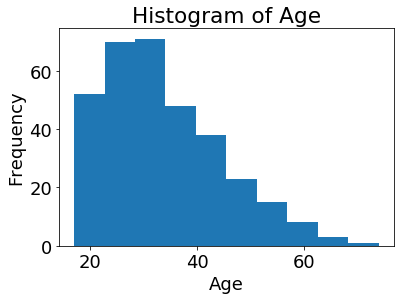

In [111]:
plt.hist(ArrestsFull["age"])
plt.title("Histogram of Age")
plt.ylabel("Frequency")
plt.xlabel("Age")

We can see that younger people (below age 40) are more likely to be arrested, and that nobody below the age of 17 is being arrested. We can see the histogram is consistent with our previous numerical summary - it looks like the average age of suspect is around 33.

I then wanted to look at arrests over time, and see if there was an increasing or decreasing trend. I pushed the value counts of the dates into a data frame below, and then created a plot to show how the number of arrests changed over the month. 

In [99]:
dates = ArrestsFull["arrest_date"].value_counts().rename_axis('Date').reset_index(name='counts')
dates = dates.sort_values(by ='Date' )
dates.head(5)

Date  counts
30  2021-02-23       1
27  2021-02-24       5
8   2021-02-25      15
17  2021-02-26       8
25  2021-02-27       6

Text(0.5, 0, 'Date')

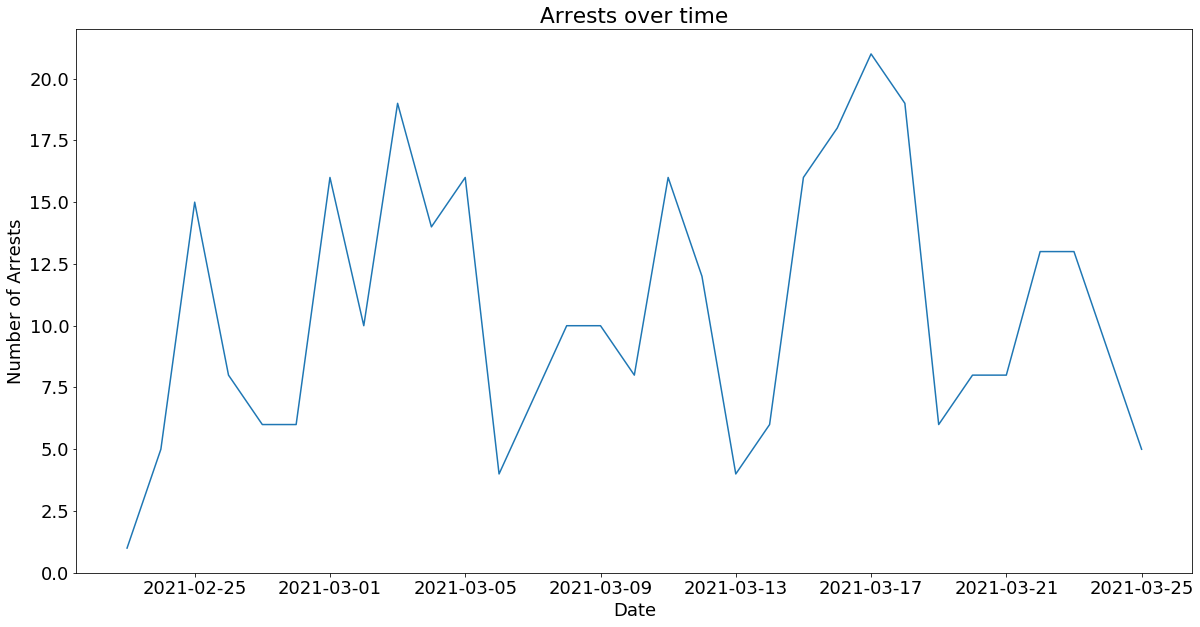

In [112]:
plt.figure(figsize=(20,10))
plt.plot(dates["Date"], dates["counts"])
plt.title("Arrests over time")
plt.ylabel("Number of Arrests")
plt.xlabel("Date")

From what I can tell, there doesn't seem to be much of a trend - everything seems pretty random. If I had more time this may be good data to run time series analysis on (because everything looks fairly stationary already.) As an additional note, with this new data frame we can look at average arrests per day:

In [116]:
print("On average " + str(dates["counts"].mean()) + " people per day were arrested in Montgomery county Marlyand from February 23 to March 25 2021.")

On average 10.612903225806452 people per day were arrested in Montgomery county Marlyand from February 23 to March 25 2021.
